# PCA

---



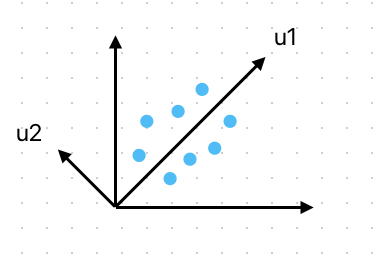

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import seaborn as sns



## Dataset

In [2]:
# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels
feature_names = data.feature_names

In [3]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:

# 1. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Perform PCA

In [5]:
# 2. Perform PCA
n_components = 2  # Number of components to reduce to
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [6]:

# 3. Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print Explained Variance
print(f"Explained Variance by Each Component: {explained_variance}")
print(f"Cumulative Explained Variance: {cumulative_variance}")

Explained Variance by Each Component: [0.72962445 0.22850762]
Cumulative Explained Variance: [0.72962445 0.95813207]


## Visualization

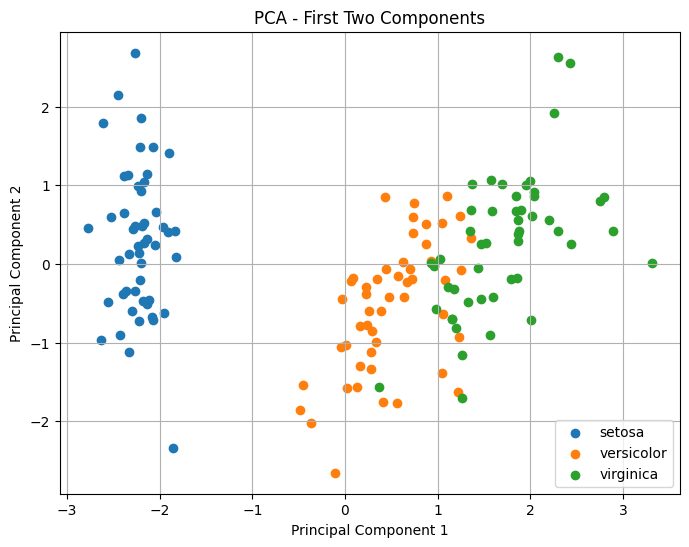

In [7]:

# 4. Visualization of PCA Components
def plot_pca_2d(X_pca, y, target_names):
    plt.figure(figsize=(8, 6))
    for target, target_name in enumerate(target_names):
        plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=target_name)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA - First Two Components")
    plt.legend()
    plt.grid()
    plt.show()

plot_pca_2d(X_pca, y, target_names=data.target_names)

In [8]:
# 5. Reconstruct the data from PCA components
X_reconstructed = pca.inverse_transform(X_pca)

# Compare the original vs reconstructed data
print("\nOriginal Data (first row):", X_scaled[0])
print("Reconstructed Data (first row):", X_reconstructed[0])


Original Data (first row): [-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
Reconstructed Data (first row): [-0.99888895  1.05319838 -1.30270654 -1.24709825]


## Scree Plot

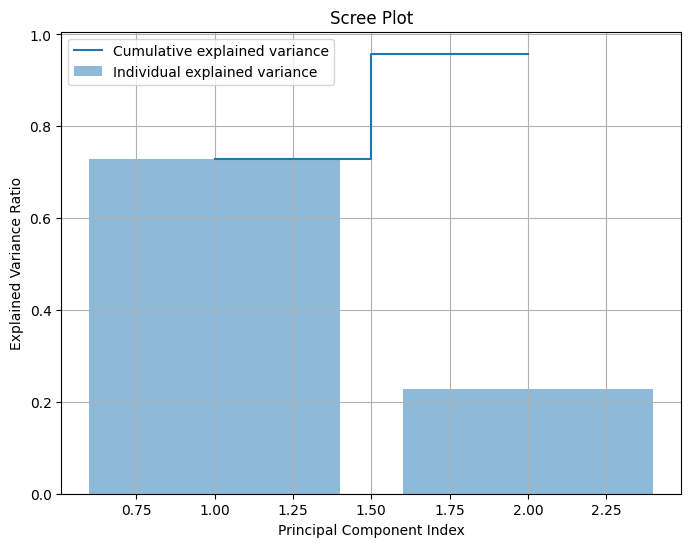

In [9]:
# 6. Scree Plot for Explained Variance
def plot_scree_plot(explained_variance):
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
    plt.xlabel('Principal Component Index')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

plot_scree_plot(pca.explained_variance_ratio_)

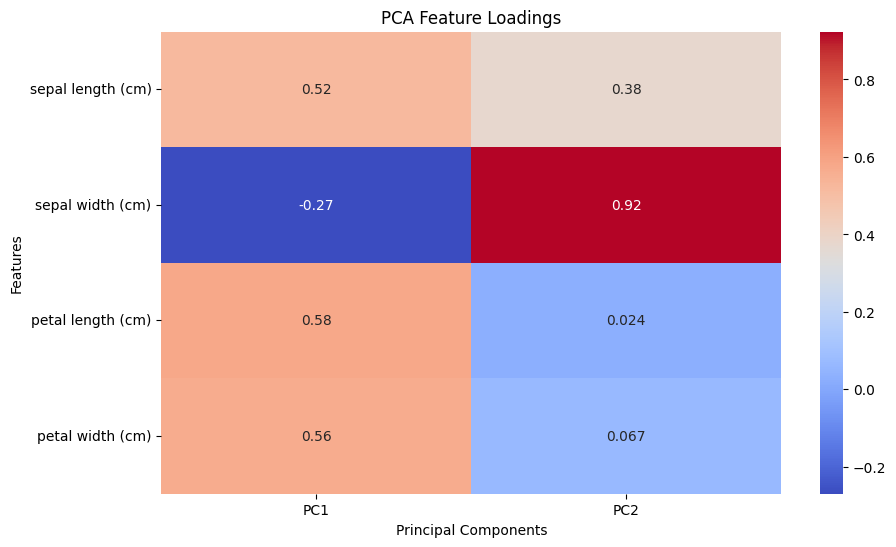

In [10]:
# 7. Correlation of original features with principal components
def plot_pca_loadings(pca, feature_names):
    plt.figure(figsize=(10, 6))
    components = pd.DataFrame(pca.components_, columns=feature_names, index=[f"PC{i+1}" for i in range(pca.n_components_)])
    sns.heatmap(components.T, annot=True, cmap='coolwarm', cbar=True)
    plt.title("PCA Feature Loadings")
    plt.xlabel("Principal Components")
    plt.ylabel("Features")
    plt.show()

# Uncomment this if you have seaborn installed
plot_pca_loadings(pca, feature_names)
